# Downloading neXtSIM forecasts
Goal is to find ourselves a baseline against which to compare IceNet and DiffIceNet. See [this page](https://data.marine.copernicus.eu/product/ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/services) for the source and metadata of the neXtSIM operational forecasts we're working with. There are two products listed on that page:
* `cmems_mod_arc_phy_anfc_nextsim_P1M-m`, a monthly-averaged product, and
* `cmems_mod_arc_phy_anfc_nextsim_hm`, an hourly product.


In [3]:
import copernicusmarine
import os
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
!pwd

/data/hpcdata/users/anddon76/icenet


In [ ]:
# this is what i would run if it worked, but it doesn't, because of some weird datetime decoding error in xarray

# copernicusmarine.subset(
#   dataset_id="cmems_mod_arc_phy_anfc_nextsim_P1M-m",
#   minimum_longitude=-180,
#   maximum_longitude=180,
#   minimum_latitude=60,
#   maximum_latitude=90,
#   start_datetime="2021-01-01T00:00:00Z",
#   end_datetime="2021-01-31T23:59:59Z",
#   output_filename = "nextsim_jan_2021.nc",
#   output_directory = "nextsim"
# )

In [3]:
query_metadata = copernicusmarine.get(dataset_id="cmems_mod_arc_phy_anfc_nextsim_P1M-m", dry_run=True)
for file in query_metadata.files:
    print(file.file_path)

INFO - 2025-01-30T10:55:59Z - Selected dataset version: "202311"
INFO - 2025-01-30T10:55:59Z - Selected dataset part: "default"
INFO - 2025-01-30T10:55:59Z - Listing files on remote server...
1it [00:00,  4.82it/s]

ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_P1M-m_202311/2019/201908_mm-nersc-MODEL-nextsimf-ARC-fv00.0.nc
ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_P1M-m_202311/2019/201909_mm-nersc-MODEL-nextsimf-ARC-fv00.0.nc
ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_P1M-m_202311/2019/201910_mm-nersc-MODEL-nextsimf-ARC-fv00.0.nc
ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_P1M-m_202311/2019/201911_mm-nersc-MODEL-nextsimf-ARC-fv00.0.nc
ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_P1M-m_202311/2019/201912_mm-nersc-MODEL-nextsimf-ARC-fv00.0.nc
ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_P1M-m_202311/2020/202001_mm-nersc-MODEL-nextsimf-ARC-fv00.0.nc
ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_P1M-m_202311/2020/202002_mm-nersc-MODEL-nextsimf-ARC-fv00.0.nc
ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc

In [ ]:
copernicusmarine.get(
    dataset_id="cmems_mod_arc_phy_anfc_nextsim_P1M-m",
    filter="*202109*",
    output_directory = "icenet-experimental/nextsim"
)

INFO - 2025-01-30T10:57:53Z - Selected dataset version: "202311"
INFO - 2025-01-30T10:57:53Z - Selected dataset part: "default"
INFO - 2025-01-30T10:57:54Z - Listing files on remote server...
1it [00:00,  4.63it/s]


ResponseGet(files=[FileGet(s3_url='s3://mdl-native-10/native/ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_P1M-m_202311/2021/202101_mm-nersc-MODEL-nextsimf-ARC-fv00.0.nc', https_url='https://s3.waw3-1.cloudferro.com/mdl-native-10/native/ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_P1M-m_202311/2021/202101_mm-nersc-MODEL-nextsimf-ARC-fv00.0.nc', file_size=102.38325119018555, last_modified_datetime='2023-11-10T11:13:38.347000+00:00', etag='"d11e7f36c2de86551c25796cd557995c"', file_format='.nc', output_directory=PosixPath('nextsim'), filename='202101_mm-nersc-MODEL-nextsimf-ARC-fv00.0.nc', file_path=PosixPath('nextsim/ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_P1M-m_202311/2021/202101_mm-nersc-MODEL-nextsimf-ARC-fv00.0.nc'), file_status='DOWNLOADED')], files_deleted=None, files_not_found=None, number_of_files_to_download=1, total_size=102.38325119018555, status='000', message='The request was successful.')

In [15]:
nextsim = xr.open_dataset("/data/hpcdata/users/anddon76/icenet/icenet-experimental/nextsim/ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_P1M-m_202311/2021/202109_mm-nersc-MODEL-nextsimf-ARC-fv00.0.nc",
                          decode_times=False)
nextsim

<xarray.Dataset> Size: 561MB
Dimensions:         (y: 2367, x: 2467, time: 1, nv: 2)
Coordinates:
  * y               (y) float64 19kB -4.3e+06 -4.297e+06 ... 2.795e+06 2.798e+06
  * x               (x) float64 20kB -3.6e+06 -3.597e+06 ... 3.795e+06 3.798e+06
    longitude       (y, x) float64 47MB ...
    latitude        (y, x) float64 47MB ...
  * time            (time) float64 8B 4.445e+04
Dimensions without coordinates: nv
Data variables:
    stereographic   int8 1B ...
    time_bnds       (time, nv) float64 16B ...
    siconc          (time, y, x) float64 47MB ...
    sithick         (time, y, x) float64 47MB ...
    sisnthick       (time, y, x) float64 47MB ...
    vxsi            (time, y, x) float64 47MB ...
    vysi            (time, y, x) float64 47MB ...
    sialb           (time, y, x) float64 47MB ...
    siage           (time, y, x) float64 47MB ...
    siconc_my       (time, y, x) float64 47MB ...
    siconc_young    (time, y, x) float64 47MB ...
    si_ridge_ratio  (time, y, x) float64 47MB ...
Attributes:
    Conventions:       CF-1.6
    institution:       NERSC, Jahnebakken 3, N-5007 Bergen, Norway
    source:            neXtSIM model fields
    history:           2023-06-21 20:46:24: cmems_postproc.py ...\n
    NCO:               4.7.2
    email:             nextsimf@nersc.no
    title:             neXtSIM-F sea ice forecast, 3 km monthly averaged fiel...
    cmems_product_id:  ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011
    field_type:        Files based on file type moorings
    field_date:        2021-09-16

Right, so that's a monthly-averaged product, not what we want. Let's go for the hourly product this time.

In [4]:
query_metadata = copernicusmarine.get(dataset_id="cmems_mod_arc_phy_anfc_nextsim_hm", filter="*20250131*", dry_run=True)
for file in query_metadata.files:
    print(file.file_path)

INFO - 2025-02-04T15:57:27Z - Selected dataset version: "202311"
INFO - 2025-02-04T15:57:27Z - Selected dataset part: "default"
INFO - 2025-02-04T15:57:28Z - Listing files on remote server...
3it [00:01,  2.44it/s]


ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_hm_202311/2025/01/20250130_hr-nersc-MODEL-nextsimf-ARC-b20250131-fv00.0.nc
ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_hm_202311/2025/01/20250131_hr-nersc-MODEL-nextsimf-ARC-b20250201-fv00.0.nc


In [5]:
copernicusmarine.get(
    dataset_id="cmems_mod_arc_phy_anfc_nextsim_hm",
    filter="*20250131_hr-nersc-MODEL-nextsimf-ARC-b20250201*",  # 31 jan 2025
    output_directory = "icenet-experimental/nextsim"
)

INFO - 2025-02-04T15:58:14Z - Selected dataset version: "202311"
INFO - 2025-02-04T15:58:14Z - Selected dataset part: "default"
INFO - 2025-02-04T15:58:15Z - Listing files on remote server...
3it [00:00,  4.25it/s]


ResponseGet(files=[FileGet(s3_url='s3://mdl-native-10/native/ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_hm_202311/2025/01/20250131_hr-nersc-MODEL-nextsimf-ARC-b20250201-fv00.0.nc', https_url='https://s3.waw3-1.cloudferro.com/mdl-native-10/native/ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_hm_202311/2025/01/20250131_hr-nersc-MODEL-nextsimf-ARC-b20250201-fv00.0.nc', file_size=796.1613540649414, last_modified_datetime='2025-02-01T03:48:05.128000+00:00', etag='"39ac4848bc25399c53480971797578f7-100"', file_format='.nc', output_directory=PosixPath('icenet-experimental/nextsim'), filename='20250131_hr-nersc-MODEL-nextsimf-ARC-b20250201-fv00.0.nc', file_path=PosixPath('icenet-experimental/nextsim/ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_hm_202311/2025/01/20250131_hr-nersc-MODEL-nextsimf-ARC-b20250201-fv00.0.nc'), file_status='DOWNLOADED')], files_deleted=None, files_not_found=None, number_of_files_to_download=

In [6]:
nextsim = xr.open_dataset("/data/hpcdata/users/anddon76/icenet/icenet-experimental/nextsim/ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/cmems_mod_arc_phy_anfc_nextsim_hm_202311/2025/01/20250131_hr-nersc-MODEL-nextsimf-ARC-b20250201-fv00.0.nc",
                          decode_times=False)
nextsim

<xarray.Dataset> Size: 11GB
Dimensions:         (y: 2367, x: 2467, time: 24, nv: 2)
Coordinates:
  * y               (y) float64 19kB -4.3e+06 -4.297e+06 ... 2.795e+06 2.798e+06
  * x               (x) float64 20kB -3.6e+06 -3.597e+06 ... 3.795e+06 3.798e+06
    longitude       (y, x) float64 47MB ...
    latitude        (y, x) float64 47MB ...
  * time            (time) float64 192B 4.569e+04 4.569e+04 ... 4.569e+04
Dimensions without coordinates: nv
Data variables:
    stereographic   int8 1B ...
    time_bnds       (time, nv) float64 384B ...
    siconc          (time, y, x) float64 1GB ...
    sithick         (time, y, x) float64 1GB ...
    sisnthick       (time, y, x) float64 1GB ...
    vxsi            (time, y, x) float64 1GB ...
    vysi            (time, y, x) float64 1GB ...
    sialb           (time, y, x) float64 1GB ...
    siage           (time, y, x) float64 1GB ...
    siconc_young    (time, y, x) float64 1GB ...
    siconc_my       (time, y, x) float64 1GB ...
    si_ridge_ratio  (time, y, x) float64 1GB ...
Attributes:
    title:           Arctic sea ice forecast
    credit:          E.U. Copernicus Marine Service Information (CMEMS)
    references:      https://marine.copernicus.eu/
    contact:         servicedesk.cmems@mercator-ocean.eu
    Conventions:     CF-1.6
    institution:     NERSC, Jahnebakken 3, N-5007 Bergen, Norway
    source:          neXtSIM model fields
    bulletin_date:   2025-02-01
    forecast_range:  9 days
    field_date:      2025-01-31

In [7]:
nextsim["time_bnds"]

<xarray.DataArray 'time_bnds' (time: 24, nv: 2)> Size: 384B
[48 values with dtype=float64]
Coordinates:
  * time     (time) float64 192B 4.569e+04 4.569e+04 ... 4.569e+04 4.569e+04
Dimensions without coordinates: nv
Attributes:
    units:    days since 1900-01-01 00:00:00

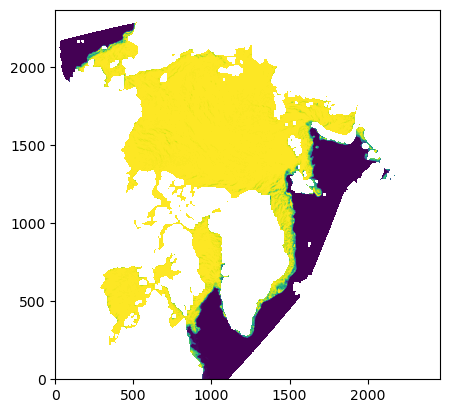

In [8]:
plt.imshow(nextsim["siconc"].isel(time=0).to_numpy(), origin="lower")

In [10]:
# animate 24 hour loop of SIC
# edge animation
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fps = 10
def update(step):
    im.set_data(nextsim["siconc"].isel(time=step).to_numpy())
    title.set_text(f"neXtSIM Analysis 2025-01-31 Hour {step+1}")
im = ax.imshow(nextsim["siconc"].isel(time=0).to_numpy(), vmin=0, vmax=1, origin="lower", animated=True)
title = plt.suptitle(f"neXtSIM Analysis 2025-01-31 Hour 1")
plt.tight_layout()
animation = FuncAnimation(fig, update, range(24), interval=1000 / fps)
plt.close()
animation.save(f"icenet-experimental/nextsim/20250131hourly.mp4", fps=fps)

Potential regions of interest in Arctic

In [11]:
import xarray as xr
amsr = xr.open_dataset("/data/twins/wip/common/sic/amsr2/north/asi-AMSR2-n6250-20190901-v5.4.nc")

In [12]:
amsr

<xarray.Dataset> Size: 9MB
Dimensions:              (x: 1216, y: 1792)
Coordinates:
  * x                    (x) float64 10kB -3.847e+06 -3.841e+06 ... 3.747e+06
  * y                    (y) float64 14kB -5.347e+06 -5.341e+06 ... 5.847e+06
Data variables:
    polar_stereographic  |S1 1B ...
    z                    (y, x) float32 9MB ...
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Sep 02 05:34:53 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017/20/01

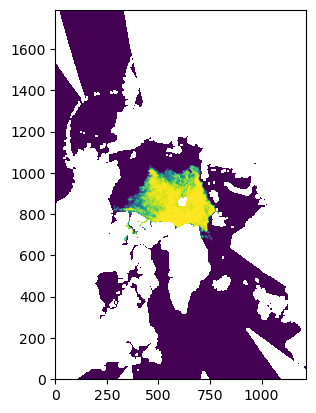

In [13]:
import matplotlib.pyplot as plt
plt.imshow(amsr.z.to_numpy(), origin="lower")

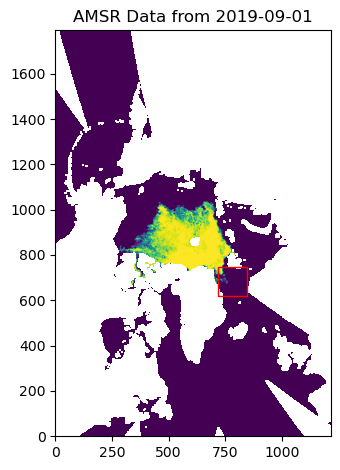

In [21]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
ax.imshow(amsr.z, origin="lower")
r = Rectangle((720, 620), 128, 128, edgecolor="red", facecolor=(0, 0, 0, 0))
ax.add_patch(r)
plt.title("AMSR Data from 2019-09-01")
plt.tight_layout()

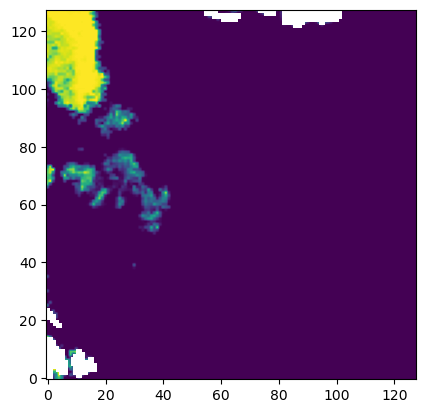

In [20]:
plt.imshow(amsr.z[620:620+128, 720:720+128], origin="lower")